   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
模型准确率: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



e:\anaconda3\envs\xgb\lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
e:\anaconda3\envs\xgb\lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "tree_model", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

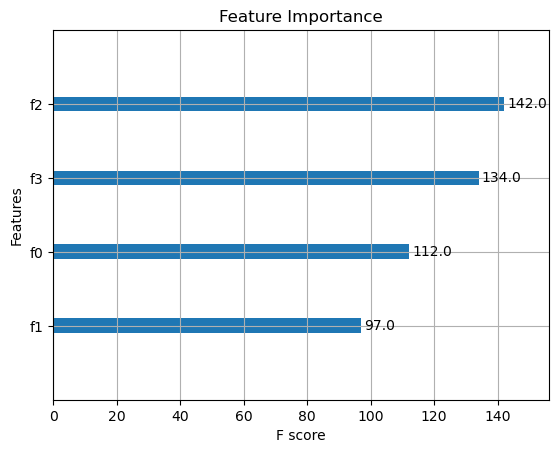

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

from sklearn.datasets import load_iris

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 将数据转换为 DataFrame
data = pd.DataFrame(data=X, columns=iris.feature_names)
data['target'] = y
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 初始化模型
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', device='cuda', tree_model='hist')
# 训练模型
model.fit(X_train, y_train)
# 进行预测
y_pred = model.predict(X_test)
# 评估准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.2f}")

# 打印分类报告
print(classification_report(y_test, y_pred, target_names=iris.target_names))
# 绘制特征重要性图
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', max_num_features=5)
plt.title('Feature Importance')
plt.show()
